In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import os
os.chdir("/Users/keith/astr/research_astr/summer-roman-project/new-sims/fits")

In [2]:
wangetal_slitless = fits.open("comparison_slitless.fits")[1].data
basic_slitless = fits.open("basic-with-seg.fits")[0].data
full_sim_slitless = fits.open("full_sim.fits")[0].data

In [3]:
# Background subtraction
from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()
bkg = Background2D(wangetal_slitless, (511,511), filter_size=(3,3), bkg_estimator=bkg_estimator)
wangetal_slitless -= bkg.background

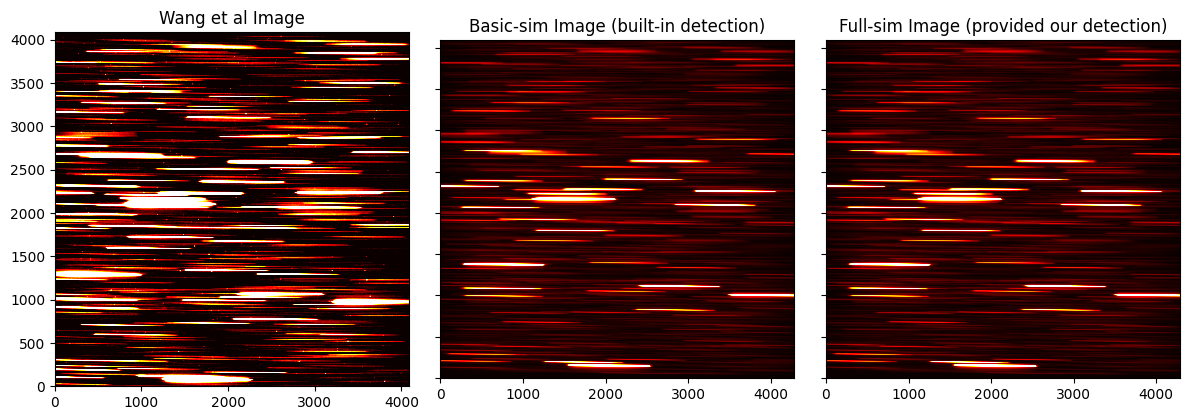

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.imshow(wangetal_slitless/np.max(wangetal_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.00125)
ax1.set_title("Wang et al Image")

ax2.imshow(basic_slitless[100:-100]/np.max(basic_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax2.set_title("Basic-sim Image (built-in detection)")

ax3.imshow(full_sim_slitless[100:-100]/np.max(full_sim_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax3.set_title("Full-sim Image (provided our detection)")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
    
fig.tight_layout()

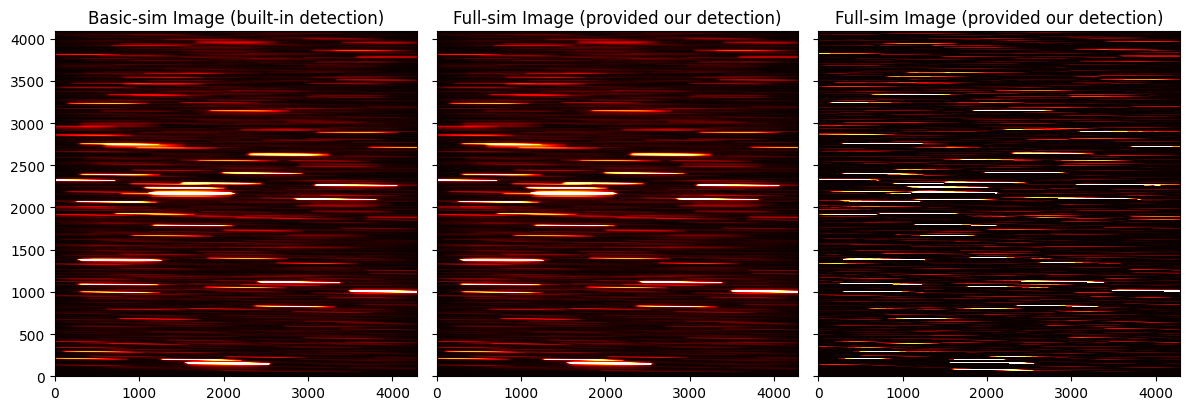

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.imshow(basic_slitless[100:-100]/np.max(basic_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax1.set_title("Basic-sim Image (built-in detection)")

ax2.imshow(full_sim_slitless[100:-100]/np.max(full_sim_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax2.set_title("Full-sim Image (provided our detection)")

ax3.imshow(basic_slitless[100:-100]/np.max(basic_slitless) - full_sim_slitless[100:-100]/np.max(full_sim_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.000008) # Note the extremely small vmax
ax3.set_title("Full-sim Image (provided our detection)")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
    
fig.tight_layout()

Text(0.5, 1.0, 'Difference')

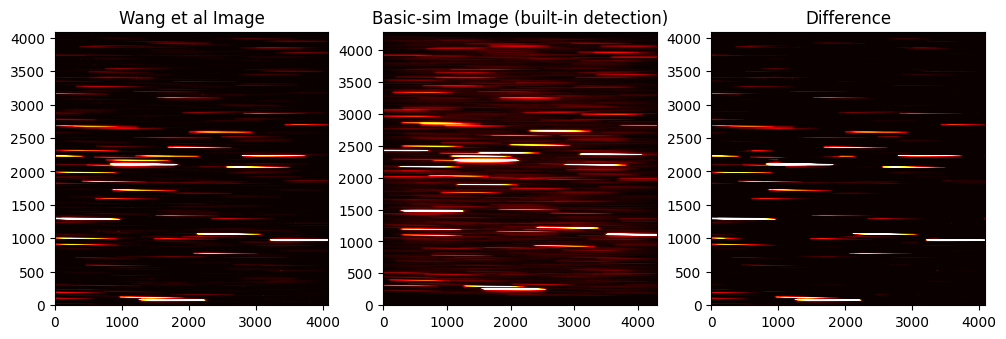

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.imshow(wangetal_slitless/np.max(wangetal_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax1.set_title("Wang et al Image")

ax2.imshow(basic_slitless/np.max(basic_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax2.set_title("Basic-sim Image (built-in detection)")

ax3.imshow(wangetal_slitless/np.max(wangetal_slitless) - basic_slitless[100:-100, 100:-100]/np.max(basic_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax3.set_title("Difference")


Text(0.5, 1.0, 'Difference')

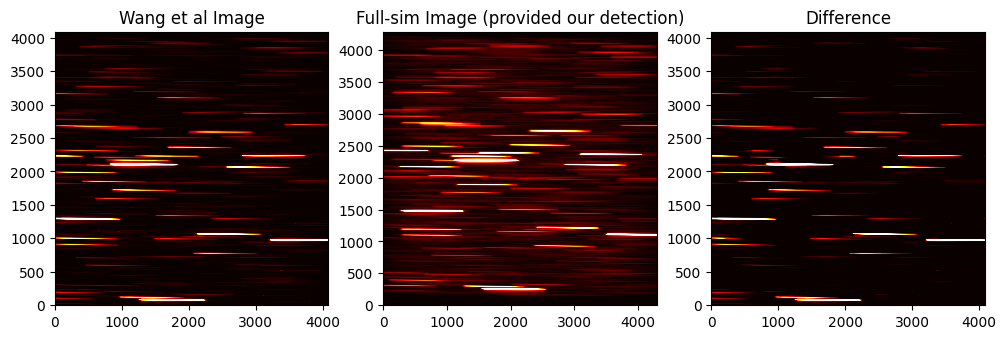

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.imshow(wangetal_slitless/np.max(wangetal_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax1.set_title("Wang et al Image")

ax2.imshow(full_sim_slitless/np.max(full_sim_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax2.set_title("Full-sim Image (provided our detection)")

ax3.imshow(wangetal_slitless/np.max(wangetal_slitless) - full_sim_slitless[100:-100, 100:-100]/np.max(full_sim_slitless), 
            origin='lower', cmap='hot', vmin=0, vmax=0.0125)
ax3.set_title("Difference")
